##### Use the existing filter2D to Sobel filter the image

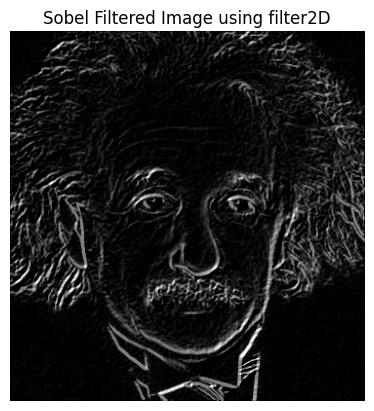

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:\5th sem\Image processing\Assignment 1 on Intensity Transformations and Neighborhood\Intensity-Transformations-and-Neighborhood\a1images\einstein.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define the Sobel filters
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]], dtype="int")
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], dtype="int")

# Apply the Sobel filter for X and Y direction
sobel_filtered_x = cv2.filter2D(image, -1, sobel_x)
sobel_filtered_y = cv2.filter2D(image, -1, sobel_y)

# Combine the two directions
sobel_combined = cv2.addWeighted(sobel_filtered_x, 0.5, sobel_filtered_y, 0.5, 0)

# Display the result
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Filtered Image using filter2D')
plt.axis('off')
plt.show()


##### Written code to Sobel filter the image

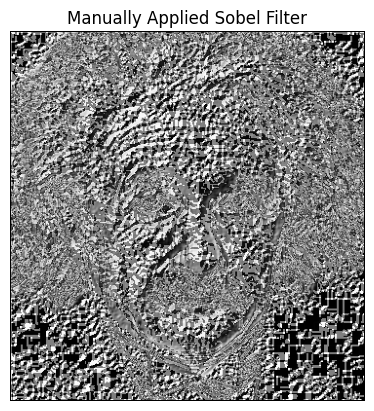

In [5]:
def apply_sobel_filter(image, kernel):
    rows, cols = image.shape
    # Pad the image
    padded_image = np.pad(image, 1, mode='constant')
    # Initialize the output image
    output = np.zeros_like(image)
    # Perform convolution
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extract the region of interest
            roi = padded_image[i-1:i+2, j-1:j+2]
            # Perform element-wise multiplication
            output[i, j] = np.sum(roi * kernel)
    return output

# Apply Sobel filter
sobel_x_output = apply_sobel_filter(image, sobel_x)
sobel_y_output = apply_sobel_filter(image, sobel_y)
manual_sobel_combined = cv2.addWeighted(sobel_x_output, 0.5, sobel_y_output, 0.5, 0)

# Display the result
plt.imshow(manual_sobel_combined, cmap='gray')
plt.title('Manually Applied Sobel Filter')
plt.axis('off')
plt.show()


##### Using the property to carry out Sobel filtering

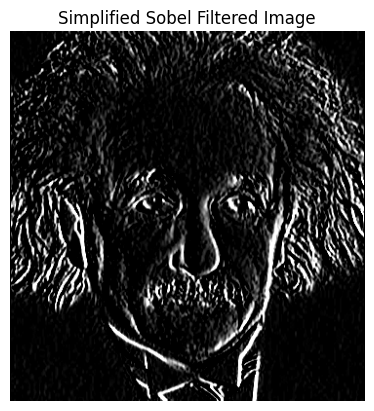

In [4]:
# Define the simplified kernel based on the property provided
simplified_kernel = np.array([[2, 0, -2], [2, 0, -2], [2, 0, -2]])  # Simplified Sobel

# Apply this kernel directly
simplified_sobel = cv2.filter2D(image, -1, simplified_kernel)

# Display the result
plt.imshow(simplified_sobel, cmap='gray')
plt.title('Simplified Sobel Filtered Image')
plt.axis('off')
plt.show()
